In [1]:
# import libraries
import re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# text libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from textblob import TextBlob
from wordcloud import WordCloud
nltk.download('stopwords')
tokenizer=RegexpTokenizer(r'\w+')
ps=PorterStemmer()
en_stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hira\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**load dataset**

In [2]:
# Read the dataset
df = pd.read_csv('finalSentimentdata2.csv', encoding='latin-1')
df.head()

,Unnamed: 0,sentiment,text
0,3204,sad,agree the poor in india are treated badly thei...
1,1431,joy,if only i could have spent the with this cutie...
2,654,joy,will nature conservation remain a priority in ...
3,2530,sad,coronavirus disappearing in italy show this to...
4,2296,sad,uk records lowest daily virus death toll since...


**text cleaning**

In [3]:
def getCleanedText(text):
    text = text.lower()
    tokens=tokenizer.tokenize(text)
    new_tokens=[token for token in tokens if token not in en_stop]
    stemmed_tokens=[ps.stem(tokens) for tokens in new_tokens]
    clean_text=" ".join(stemmed_tokens)
    return clean_text

df['text']=df['text'].apply(getCleanedText)
df['text'].head()

0    agre poor india treat badli poor seek live sin...
1    could spent cuti vc sakshi__ n g h coast cross...
2    natur conserv remain prioriti post corona bang...
3    coronaviru disappear itali show intellectu say...
4    uk record lowest daili viru death toll sinc st...
Name: text, dtype: object

### Subjectivity and Polarity of Text

In [4]:
# a new function to get the subjectivity
def getSubjectivity(tweet_text):
    return TextBlob(tweet_text).sentiment.subjectivity

# a function to get the polarity
def getPolarity(tweet_text):
    return TextBlob(tweet_text).sentiment.polarity

df['Subjectivity'] = df['text'].apply(getSubjectivity)
df['Polarity'] = df['text'].apply(getPolarity)

# sentiment to categorical data
df['sentiment'] = df['sentiment'].replace({'anger':0,'sad':1, 'fear':2, 'joy':3})
df.head()

,Unnamed: 0,sentiment,text,Subjectivity,Polarity
0,3204,1,agre poor india treat badli poor seek live sin...,0.60,0.030606
1,1431,3,could spent cuti vc sakshi__ n g h coast cross...,0.05,-0.050000
2,654,3,natur conserv remain prioriti post corona bang...,0.00,0.000000
3,2530,1,coronaviru disappear itali show intellectu say...,0.00,0.000000
4,2296,1,uk record lowest daili viru death toll sinc st...,0.00,0.000000


**plot the word cloud**

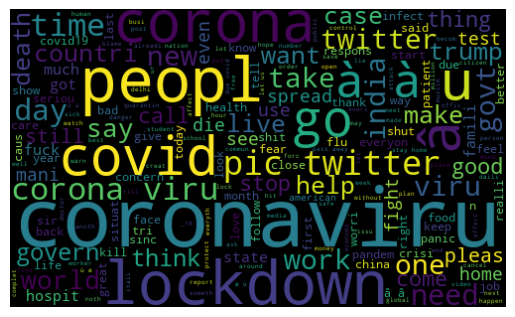

In [5]:
allWords = ''.join([twts for twts in df['text']])
wordCloud = WordCloud(width = 500,height =300,random_state = 21,max_font_size =
119).generate(allWords)
plt.imshow(wordCloud,interpolation = "bilinear")
plt.axis('off')
plt.show()

**Create a function to compute the negative,neutral and positive analysis**

In [6]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Unnamed: 0,sentiment,text,Subjectivity,Polarity,Analysis
0,3204,1,agre poor india treat badli poor seek live sin...,0.600000,0.030606,Positive
1,1431,3,could spent cuti vc sakshi__ n g h coast cross...,0.050000,-0.050000,Negative
2,654,3,natur conserv remain prioriti post corona bang...,0.000000,0.000000,Neutral
3,2530,1,coronaviru disappear itali show intellectu say...,0.000000,0.000000,Neutral
4,2296,1,uk record lowest daili viru death toll sinc st...,0.000000,0.000000,Neutral
...,...,...,...,...,...,...
3085,2579,1,today 02 30pm 54 year old bangladeshi male adm...,0.266667,0.200000,Positive
3086,3579,0,corona viru implor ceas activ april 1st sugges...,0.000000,0.000000,Neutral
3087,221,3,issa date lockdown end inshaallah corona red_h...,0.000000,0.000000,Neutral
3088,2705,1,death toll due covid 19 rose 31 jammu kashmir ...,0.383333,0.041667,Positive


**Plot the polarity and subjectivity**

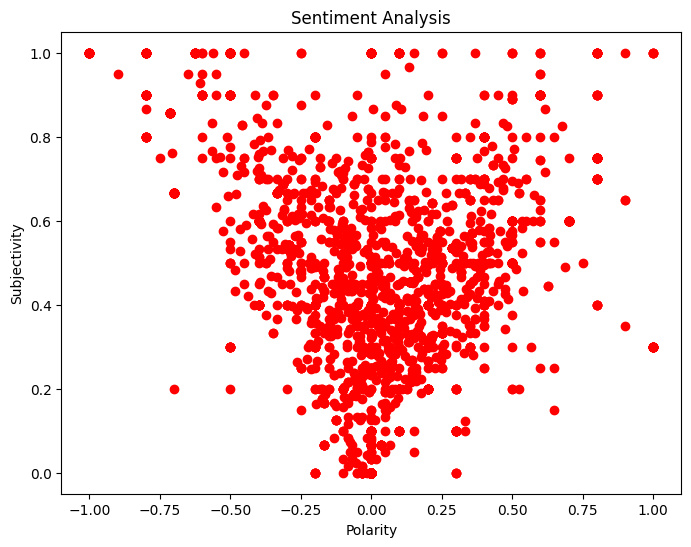

In [7]:
plt.figure(figsize = (8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color = 'red')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

**percentage of a tweets**

In [8]:
# Get the percentage of positive tweets
pos_tweets = df[df.Analysis == 'Positive']
pos_tweets = pos_tweets['text']
print("Positive tweets " +str(round((pos_tweets.shape[0]/df.shape[0])*100,2))+" %")

#Get the percentage of Negative tweets
neg_tweets = df[df.Analysis == 'Negative']
neg_tweets = neg_tweets['text']
print("Negative tweets " +str(round((neg_tweets.shape[0]/df.shape[0])*100,2))+" %")

#Get the percentage of Neutral tweets
neu_tweets = df[df.Analysis == 'Neutral']
neu_tweets = neu_tweets['text']
print("Neutral tweets " +str(round((neu_tweets.shape[0]/df.shape[0])*100,2))+" %")


Positive tweets 32.27 %
Negative tweets 28.28 %
Neutral tweets 39.45 %


**Plot and visualize the counts**

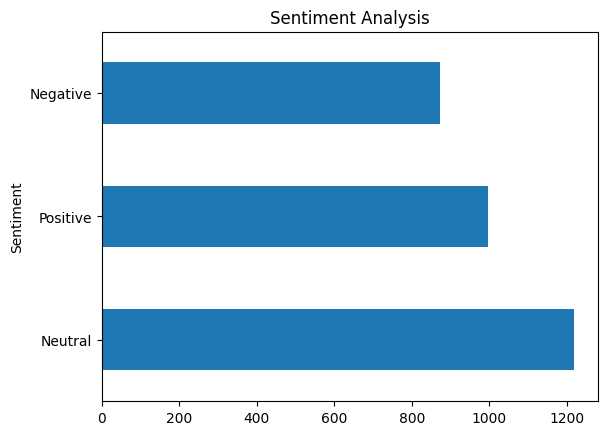

In [9]:
#Show the value counts
df['Analysis'].value_counts()


plt.title('Sentiment Analysis')
plt.xlabel('Counts')
plt.ylabel('Sentiment')
df['Analysis'].value_counts().plot(kind = 'barh')
plt.show()

**import libraries for classification model**

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer


**preprocressing**

In [11]:
df

,Unnamed: 0,sentiment,text,Subjectivity,Polarity,Analysis
0,3204,1,agre poor india treat badli poor seek live sin...,0.600000,0.030606,Positive
1,1431,3,could spent cuti vc sakshi__ n g h coast cross...,0.050000,-0.050000,Negative
2,654,3,natur conserv remain prioriti post corona bang...,0.000000,0.000000,Neutral
3,2530,1,coronaviru disappear itali show intellectu say...,0.000000,0.000000,Neutral
4,2296,1,uk record lowest daili viru death toll sinc st...,0.000000,0.000000,Neutral
...,...,...,...,...,...,...
3085,2579,1,today 02 30pm 54 year old bangladeshi male adm...,0.266667,0.200000,Positive
3086,3579,0,corona viru implor ceas activ april 1st sugges...,0.000000,0.000000,Neutral
3087,221,3,issa date lockdown end inshaallah corona red_h...,0.000000,0.000000,Neutral
3088,2705,1,death toll due covid 19 rose 31 jammu kashmir ...,0.383333,0.041667,Positive


In [12]:
X = df[['Subjectivity', 'Polarity']]
y = df['sentiment']
print(X)

      Subjectivity  Polarity
0         0.600000  0.030606
1         0.050000 -0.050000
2         0.000000  0.000000
3         0.000000  0.000000
4         0.000000  0.000000
...            ...       ...
3085      0.266667  0.200000
3086      0.000000  0.000000
3087      0.000000  0.000000
3088      0.383333  0.041667
3089      0.600000 -0.400000

[3090 rows x 2 columns]


**data spiliting for training and testing**

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

In [14]:
# Evaluate Model Function

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print('\033[1m'+'\t\t\tClassification Report'+'\033[0m')
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    sns.set(rc = {'figure.figsize':(8,8)})
    categories = ['Negative','Neutral','Positive']
    sns.heatmap(cf_matrix, annot=True,fmt='d',xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

**load RadomForestClassifier and train,test
 the model**

In [15]:
RF=RandomForestClassifier()
RF_model=RF.fit(X_train,y_train)
print("Train Accuracy",RF_model.score(X_train,y_train))
print("Test Accuracy",RF_model.score(X_test,y_test))

Train Accuracy 0.5852981969486823
Test Accuracy 0.33872707659115425


			Classification Report
              precision    recall  f1-score   support

           0       0.39      0.22      0.28       228
           1       0.36      0.27      0.31       237
           2       0.26      0.48      0.34       241
           3       0.46      0.38      0.42       221

    accuracy                           0.34       927
   macro avg       0.37      0.34      0.34       927
weighted avg       0.37      0.34      0.34       927



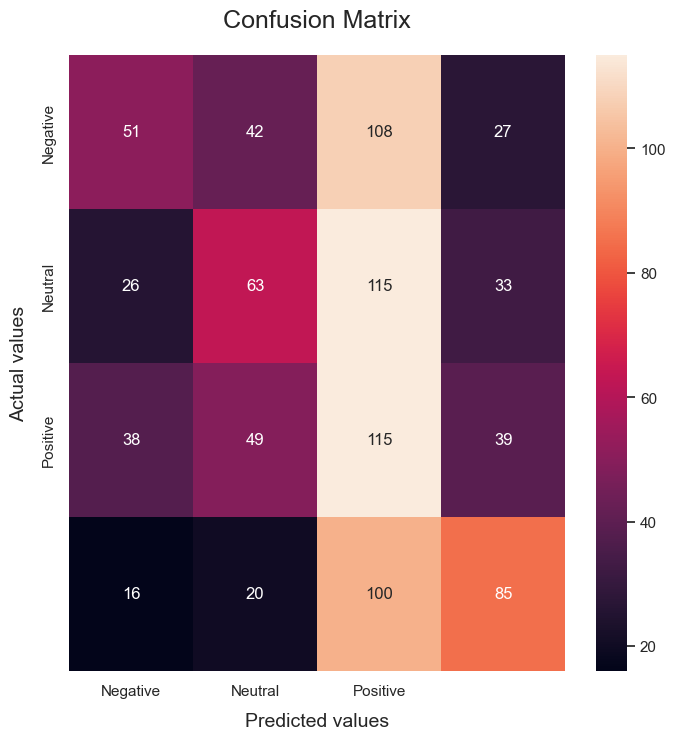

In [16]:
model_Evaluate(RF_model)

**load Decision TreeClassifier and train,test the model**

Train Accuracy 0.5852981969486823
Test Accuracy 0.34627831715210355
			Classification Report
              precision    recall  f1-score   support

           0       0.37      0.25      0.30       228
           1       0.37      0.30      0.33       237
           2       0.27      0.49      0.35       241
           3       0.53      0.35      0.42       221

    accuracy                           0.35       927
   macro avg       0.38      0.34      0.35       927
weighted avg       0.38      0.35      0.35       927



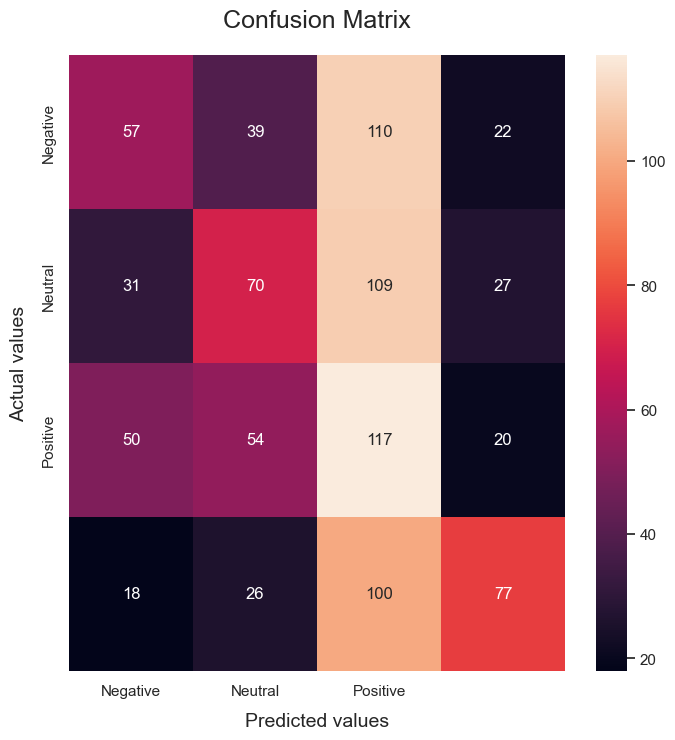

In [18]:
DT=DecisionTreeClassifier()
DT_model=DT.fit(X_train,y_train)
print("Train Accuracy",DT_model.score(X_train,y_train))
print("Test Accuracy",DT_model.score(X_test,y_test))
model_Evaluate(DT_model)

**load LogisticRegression and train,test the model**

Train Accuracy 0.3365695792880259
Test Accuracy 0.32362459546925565
			Classification Report
              precision    recall  f1-score   support

           0       0.33      0.29      0.31       228
           1       0.27      0.43      0.33       237
           2       0.23      0.11      0.15       241
           3       0.46      0.48      0.47       221

    accuracy                           0.32       927
   macro avg       0.32      0.33      0.31       927
weighted avg       0.32      0.32      0.31       927



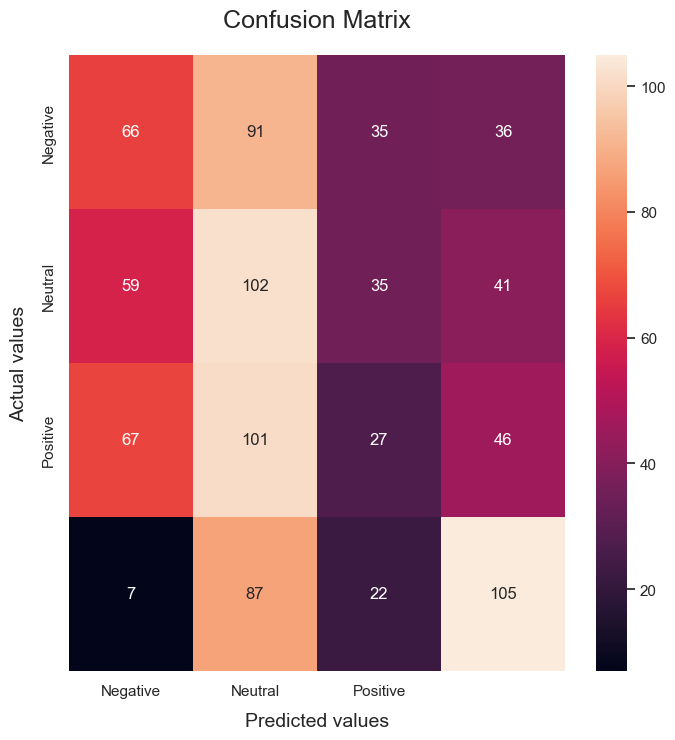

In [19]:
logreg = LogisticRegression()
logreg_model=logreg.fit(X_train, y_train)
print("Train Accuracy",logreg.score(X_train,y_train))
print("Test Accuracy",logreg.score(X_test,y_test))
model_Evaluate(logreg_model)

			Classification Report
              precision    recall  f1-score   support

           0       0.34      0.37      0.35       228
           1       0.27      0.43      0.33       237
           2       0.14      0.02      0.03       241
           3       0.42      0.51      0.46       221

    accuracy                           0.33       927
   macro avg       0.29      0.33      0.29       927
weighted avg       0.29      0.33      0.29       927



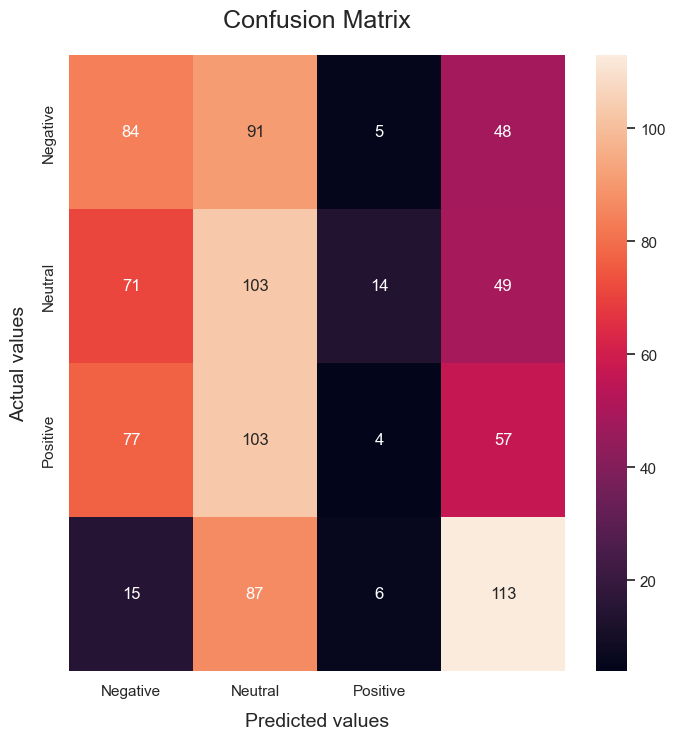

In [20]:
from sklearn.svm import LinearSVC
SVCmodel = LinearSVC()

SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)